In [1]:
import pandas as pd
import pysam
from Bio import SeqIO
import re
import os
import subprocess
import matplotlib.pyplot as plt


In [6]:
igh_pri = pd.read_csv("/home1/zhuyixin/zhuyixin_proj/AssmQuality/igGene/mCynVol1.lja.igdetective/combined_genes_IGH.txt", sep="\t")
igh_alt = pd.read_csv("/home1/zhuyixin/zhuyixin_proj/AssmQuality/igGene/mCynVol1.lja.igdetective/combined_genes_IGH.txt", sep="\t")
igh_pri = igh_pri[igh_pri['Contig'] == "scaffold_8"]
#igh_alt1 = igh_alt[igh_alt['Contig'] == "atg001440l_1"]
igh_alt2 = igh_alt[igh_alt['Contig'] == "hap_ptg000193l_1_1"]
igh_alt = igh_alt[igh_alt['Contig'] == "contig3"]

In [16]:
igh_alt2

,GeneType,Contig,Pos,Strand,Sequence,Productive,Locus
249,V,hap_ptg000193l_1_1,11759,-,CAGGTCCAGCTGGTCCAGTCTGGGGCTGAGGTGAAGAAGCCTGGAG...,True,IGH
250,V,hap_ptg000193l_1_1,20290,-,GAACTGACATTGAGGGAGTCTGGCCCAGGACTGGTGAAGCCCTCGC...,True,IGH
251,V,hap_ptg000193l_1_1,36833,-,GAGGTGCAGCTGGTGGAGTCCAGGTGAGACTTGGTGCTGACTGTGG...,False,IGH
252,V,hap_ptg000193l_1_1,47357,-,GAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCCTCAC...,True,IGH
253,V,hap_ptg000193l_1_1,61098,-,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTGGTGAAGCCTGGAG...,True,IGH
254,V,hap_ptg000193l_1_1,66832,-,GAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCCTCGC...,True,IGH
255,V,hap_ptg000193l_1_1,97079,-,AAGGTGCAGCTTCAGGAGTCAGAACCTGGCCTGGTGTAACTTCATA...,False,IGH
256,V,hap_ptg000193l_1_1,119475,-,GAGGCGCAGCTGCAGGAGTCTGGCCCGGGACTGGTGAAGCCCTCGC...,True,IGH
257,V,hap_ptg000193l_1_1,139365,-,GAGGTTCAGCTGGTGGAGTCTGGGGAAGGCTGAGTAGAGCCTGGGT...,False,IGH
258,V,hap_ptg000193l_1_1,145000,-,GAGGTGCAGCTGCAGGAGTTGGGCCCAGGACTGGTGAAGCCCTCGC...,True,IGH


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


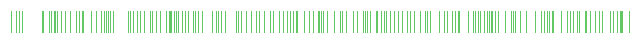

In [9]:
scale = 500
scaled_pos_list = [(pos - igh_pri['Pos'].min()) / (igh_pri['Pos'].max() - igh_pri['Pos'].min()) * scale for pos in igh_pri['Pos']]
color_dict = {('V', True) : '#63c765', ('V', False) : '#63c765', 'D' : '#63c765', 'J' : '#63c765'}
color_list = [
    color_dict.get(
        (row['GeneType'], row['Productive']),  # Access 'GeneType' and 'Productive' directly from the row
        color_dict.get(row['GeneType'], '#333333') 
    ) 
    for index, row in igh_pri.iterrows()
]
y_list = []
y_list.append(1)
fig, ax = plt.subplots(figsize=(8, 0.3))
plt.bar(scaled_pos_list, y_list, color = color_list)
ax.set_xlim([0, 500])  # Extend a bit on both sides
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')  # Remove y-axis label
ax.set_title('')   # Remove title
ax.axis('off')
ax.legend().set_visible(False)  # Remove legend
plt.savefig('../errorPlots/mCanLor2.corr/IGH.pri.genepos.svg', format="svg", dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


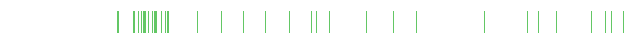

In [13]:
scale = 500
scaled_pos_list = [(pos - igh_alt['Pos'].min()) / (igh_alt['Pos'].max() - igh_alt['Pos'].min()) * scale for pos in igh_alt['Pos']]
color_dict = {('V', True) : '#63c765', ('V', False) : '#63c765', 'D' : '#63c765', 'J' : '#63c765'}
color_list = [
    color_dict.get(
        (row['GeneType'], row['Productive']),  # Access 'GeneType' and 'Productive' directly from the row
        color_dict.get(row['GeneType'], '#333333')  # Default color if the specific key is not found
    ) 
    for index, row in igh_alt.iterrows()
]
y_list = []
y_list.append(1)
fig, ax = plt.subplots(figsize=(8, 0.3))
plt.bar(scaled_pos_list, y_list, color = color_list)
ax.set_xlim([0, 500])  # Extend a bit on both sides
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')  # Remove y-axis label
ax.set_title('')   # Remove title
ax.axis('off')
ax.legend().set_visible(False)  # Remove legend
plt.savefig('../errorPlots/mCanLor1.corr/IGH.alt1.genepos.svg', format="svg", dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


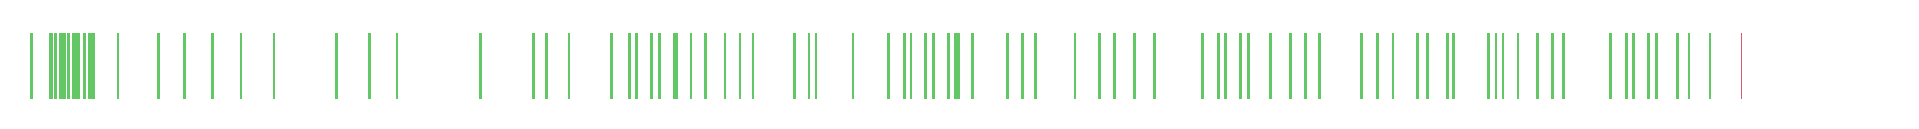

In [18]:
altLen = max(igh_alt['Pos']) - min(igh_alt['Pos'])
#altLen_4 = max(igh_alt1['Pos']) - min(igh_alt1['Pos'])
altLen_6 = max(igh_alt2['Pos']) - min(igh_alt2['Pos'])

genePlot, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 0.3), dpi=300, gridspec_kw={'width_ratios': [altLen, altLen_6]}, sharey=True)
scale = 500
scaled_pos_list = [(pos - igh_alt['Pos'].min()) / (igh_alt['Pos'].max() - igh_alt['Pos'].min()) * scale for pos in igh_alt['Pos']]
color_dict = {('V', True) : '#63c765', ('V', False) : '#63c765', 'D' : '#63c765', 'J' : '#63c765'}
color_list = [
    color_dict.get(
        (row['GeneType'], row['Productive']),  # Access 'GeneType' and 'Productive' directly from the row
        color_dict.get(row['GeneType'], '#333333')  # Default color if the specific key is not found
    ) 
    for index, row in igh_alt.iterrows()
]

# scale = 500
# scaled_pos_list1 = [(pos - igh_alt1['Pos'].min()) / (igh_alt1['Pos'].max() - igh_alt1['Pos'].min()) * scale for pos in igh_alt1['Pos']]
# color_dict1 = {('V', True) : '#6384c7', ('V', False) : '#6384c7', 'D' : '#6384c7', 'J' : '#6384c7'}
# color_list1 = [
#     color_dict1.get(
#         (row['GeneType'], row['Productive']),  # Access 'GeneType' and 'Productive' directly from the row
#         color_dict1.get(row['GeneType'], '#333333')  # Default color if the specific key is not found
#     ) 
#     for index, row in igh_alt1.iterrows()
# ]

scale = 500
scaled_pos_list2 = [(pos - igh_alt2['Pos'].min()) / (igh_alt2['Pos'].max() - igh_alt2['Pos'].min()) * scale for pos in igh_alt2['Pos']]
color_dict2 = {('V', True) : '#d95b6e', ('V', False) : '#d95b6e', 'D' : '#d95b6e', 'J' : '#d95b6e'}
color_list2 = [
    color_dict2.get(
        (row['GeneType'], row['Productive']),  # Access 'GeneType' and 'Productive' directly from the row
        color_dict2.get(row['GeneType'], '#d95b6e')  # Default color if the specific key is not found
    ) 
    for index, row in igh_alt2.iterrows()
]

y_list = []
y_list.append(1)
axes[0].bar(scaled_pos_list, y_list, color = color_list)
axes[1].bar(scaled_pos_list2, y_list, color = color_list2)
#axes[2].bar(scaled_pos_list2, y_list, color = color_list2)

axes[0].set_xlim([0, 500])  # Extend a bit on both sides
axes[0].set_xticks([])  # Remove x-axis ticks
axes[0].set_yticks([])  # Remove y-axis ticks
axes[0].set_xlabel('')  # Remove x-axis label
axes[0].set_ylabel('')  # Remove y-axis label
axes[0].set_title('')   # Remove title
axes[0].axis('off')
axes[0].legend().set_visible(False)  # Remove legend

axes[1].set_xlim([0, 500])  # Extend a bit on both sides
axes[1].set_xticks([])  # Remove x-axis ticks
axes[1].set_yticks([])  # Remove y-axis ticks
axes[1].set_xlabel('')  # Remove x-axis label
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].set_title('')   # Remove title
axes[1].axis('off')
axes[1].legend().set_visible(False)  # Remove legend

# axes[2].set_xlim([0, 500])  # Extend a bit on both sides
# axes[2].set_xticks([])  # Remove x-axis ticks
# axes[2].set_yticks([])  # Remove y-axis ticks
# axes[2].set_xlabel('')  # Remove x-axis label
# axes[2].set_ylabel('')  # Remove y-axis label
# axes[2].set_title('')   # Remove title
# axes[2].axis('off')
# axes[2].legend().set_visible(False)  # Remove legend

plt.subplots_adjust(wspace=0)

plt.savefig('../errorPlots/mCynVol1.corr/IGH.alt.genepos.svg', format="svg", dpi=300, bbox_inches='tight')

In [20]:
scaled_pos_list2

[0.0,
 28.987624788479707,
 85.199355755051,
 120.95902792407695,
 167.64979714439107,
 187.13344976860188,
 289.91022704877366,
 366.00996269087796,
 433.59451984043386,
 452.7417787412759,
 500.0]